In [38]:
import numpy as np          
import pandas as pd     
import matplotlib.pyplot as plt              
import seaborn as sns    
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import r2_score


<Axes: xlabel='x', ylabel='f(x)'>

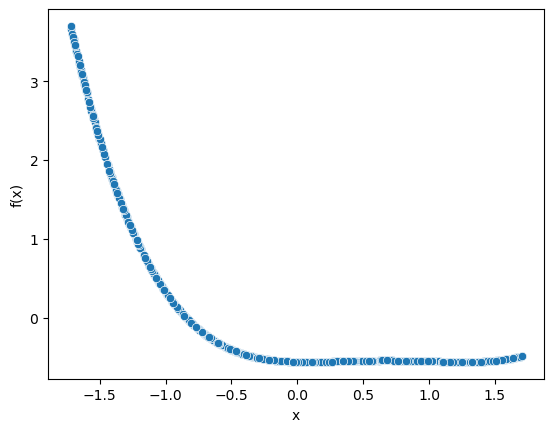

In [39]:
data=pd.read_csv('non_convex_data_1000.csv')
data['x']=(data['x']-data['x'].mean())/data['x'].std()
data['f(x)']=(data['f(x)']-data['f(x)'].mean())/data['f(x)'].std()

sns.scatterplot(x='x', y='f(x)', data=data)

In [60]:
class linear_regression:

    def __init__(self, epoch, alpha=0.01):
        self.epoch=epoch
        self.alpha=alpha
        self.weight=None
        self.cost_array=[]
        self.training_error=[]
        self.test_error=[]

    def fit(self, x,y):
        sample, features=x.shape
        self.weight=np.zeros((features,1))

        for i in range(self.epoch):
            x_theta=x.dot(self.weight)
            error=x_theta-y  
            gradient=(1/sample)*x.T.dot(error)
            cost=(1/(2*sample))*np.sum(error**2)
            self.cost_array.append(cost)
            self.weight-=self.alpha*gradient
            self.training_error.append(np.sqrt(cost))
           


    

    def predict(self, x):
        
        sample, features=x.shape
        y_pred=x.dot(self.weight)
        return y_pred
    

In [61]:
def polynomial_features(x, degree):
    return  np.hstack([x**i for i in range(degree+1)])

Average R² score: 0.9899132796049749


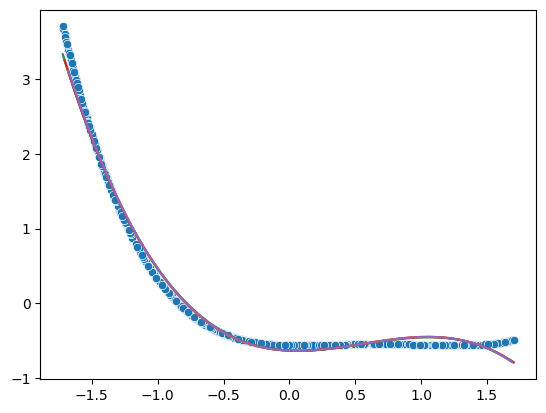

In [62]:
# cross validation part is on here

k_fold = KFold(n_splits=5, shuffle=True, random_state=42)
x=data.iloc[:,:-1].values
y=data.iloc[:,-1].values.reshape(-1,1)
r2_array=[]

sns.scatterplot(x=x.flatten(), y=y.flatten())

for train_index, test_index in k_fold.split(x):
    x_train, x_test= x[train_index], x[test_index]
    y_train, y_test= y[train_index], y[test_index]
    x_train_trans = polynomial_features(x_train, degree=3)
    x_test_trans = polynomial_features(x_test, degree=3)

    model=linear_regression(epoch=1000, alpha=0.01)
    model.fit(x_train_trans, y_train)

    y_pred=model.predict(x_test_trans)
    r2_array.append(r2_score(y_pred, y_test))

    sns.lineplot(x=x_test.flatten(), y=y_pred.flatten())



print("Average R² score:", np.mean(r2_array))

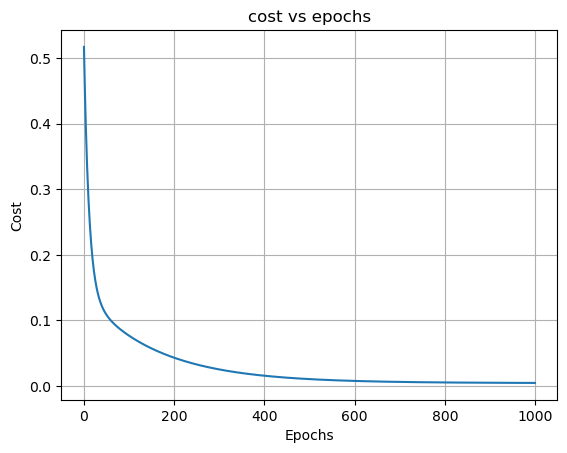

In [64]:
cost= model.cost_array
plt.plot(range(len(cost)), cost)
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.title('cost vs epochs')
plt.grid()
plt.show()